## Arewa DataScience Academy
### Deep Learning Cohort 1.0
### Name : mohammed nasiru
### Email : katada3020@gmail.com

### WEEK 2 Exercises

In [70]:
#import torch
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [71]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'using device: {device}')

using device: cpu


##### 1 Create a straight line dataset using the linear regression formula (weight * X + bias).

In [72]:
#creating known parameters
#set weight=0.3, bias=0.9
weight = 0.3
bias = 0.9

#create data 
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
#creating linear regression
y = weight * X * bias


#### 2 Split the data into 80% training, 20% testing.

In [73]:
#spliting the data into train and test
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f'lenghth of X_train: {len(X_train)}')
print(f'lenght of y_train : {len(y_train)}')
print(f'length of X_test: {len(X_test)}')
print(f'length of y_test: {len(y_test)}')


lenghth of X_train: 40
lenght of y_train : 40
length of X_test: 10
length of y_test: 10


#### 1c. Plot the training and testing data so it becomes visual.

In [74]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None) :
    plt.figure(figsize=(10,7))

    #plot training data
    plt.scatter(train_data,train_label, c='b', s=4, label='Training data')
    #plot test data
    plt.scatter(test_data,test_label, c='g', s=4, label='Test training')
    
    if predictions is not None:
        plt.scatter(test_data,predictions, c='r', s=4, label = 'prediction')

    plt.legend(prop={'size' : 14})

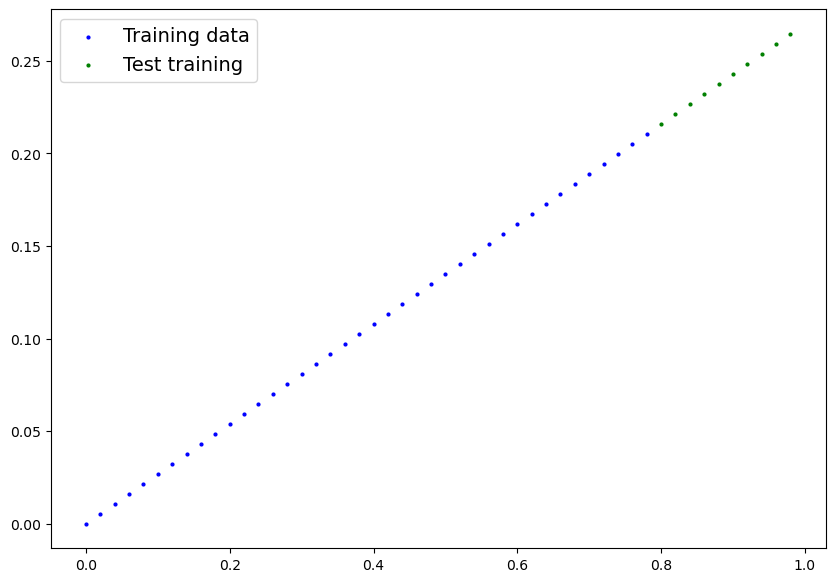

In [75]:
plot_predictions()

#### 2 Build a PyTorch model by subclassing nn.Module.

In [76]:
#build a model 
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                               dtype = torch.float32),
                                               requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float32),
                                             requires_grad=True)
        #Implement the forward()
        def forward(self, X:torch.Tensor) -> torch.Tensor:
            return self.weight * X + self.bias

In [77]:
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weight * X + self.bias


In [78]:
#settining manual_seed
torch.manual_seed(32)

# Create an instance of the model 
model = LinearRegressionModel()

# List named parameters 
model.state_dict()

OrderedDict([('weight', tensor([0.8651])), ('bias', tensor([0.0284]))])

#### 3 Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

In [79]:
#creating a loss function
loss = nn.L1Loss() 

#create optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr = 0.01)

In [80]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss_cal = loss(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_cal(test_pred, y_test.type(torch.float))

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss_cal} | MAE Test Loss: {test_loss} ")

AttributeError: 'L1Loss' object has no attribute 'backward'

In [83]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model(X_train)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss_cal = loss(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss_cal.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model.eval()

    with torch.no_grad():
        # 1. Forward pass on test data
        test_pred = model(X_test)

        # 2. Calculate loss on test data
        test_loss = loss(test_pred, y_test.type(torch.float))  
        # Print out what's happening
        if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss_cal.item())
            test_loss_values.append(test_loss.item())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss_cal.item()} | MAE Test Loss: {test_loss.item()} ")


Epoch: 0 | MAE Train Loss: 0.036391112953424454 | MAE Test Loss: 0.08464235067367554 
Epoch: 20 | MAE Train Loss: 0.029524823650717735 | MAE Test Loss: 0.06809748709201813 
Epoch: 40 | MAE Train Loss: 0.02266000211238861 | MAE Test Loss: 0.05223945900797844 
Epoch: 60 | MAE Train Loss: 0.015787193551659584 | MAE Test Loss: 0.03638143464922905 
Epoch: 80 | MAE Train Loss: 0.008917557075619698 | MAE Test Loss: 0.019836528226733208 


#### number 4

In [87]:
# 1. Set the model in evaluation mode
model.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():

  y_preds = model(X_test)
y_preds

tensor([[0.2202],
        [0.2258],
        [0.2314],
        [0.2370],
        [0.2426],
        [0.2482],
        [0.2538],
        [0.2594],
        [0.2650],
        [0.2706]])

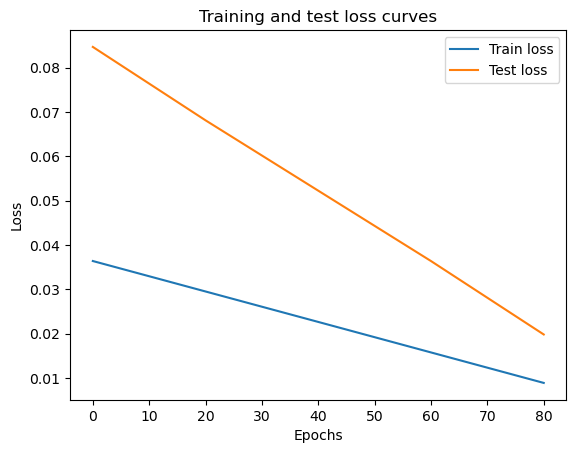

In [85]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [92]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "02_pytorch_workflow.pth"
MODEL_SAVE = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE) 

Saving model to: models\02_pytorch_workflow.pth


In [93]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [95]:
# 1. Put the loaded model into evaluation mode
loaded_model.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test) # perform a forward pass on the test data with the loaded model

In [97]:
#loaded model into evaluation mode
loaded_model.eval()

#inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test) # perform a forward pass on the test data with the loaded model